# Example - 50 - Earth SmallSat Aerocapture Demonstration - Part 2

In this example, we will use Monte Carlo simulations to assess flight performance. Reference: M.S.Werner and R.D.Braun, Mission Design and Performance Analysis of a Smallsat Aerocapture Flight Test, Journal of Spacecraft and Rockets, DOI: 10.2514/1.A33997

In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

In [2]:
import numpy as np
from scipy import interpolate
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Polygon

In [3]:
# Set up the planet and atmosphere model.
planet=Planet("EARTH")
planet.loadAtmosphereModel('../atmdata/Earth/earth-gram-avg.dat', 0 , 1 ,2, 3)
planet.h_skip = 125000.0
planet.h_low=10.0E3

# Set up the drag modulation vehicle.
vehicle=Vehicle('EarthSmallSat', 2.82, 66.4, 0.0, np.pi*0.25**2, 0.0, 0.0563, planet)
vehicle.setInitialState(125.0,0.0,0.0,9.8,0.0,-5.00,0.0,0.0)
vehicle.setSolverParams(1E-6)
vehicle.setDragModulationVehicleParams(66.4,4.72)

# Set up the drag modulation entry phase guidance parameters.
vehicle.setDragEntryPhaseParams(5.0, 50.0, 101, -200.0)

# Set the target orbit parameters.
vehicle.setTargetOrbitParams(180.0, 1760.0, 50.0)

# Define the path to atmospheric files to be used for the Monte Carlo simulations.
#atmfiles = ['../atmdata/Earth/LAT00N.txt']

atmfiles = ['../atmdata/Earth/LAT00N.txt',
            '../atmdata/Earth/LAT20N.txt',
            '../atmdata/Earth/LAT20S.txt',
            '../atmdata/Earth/LAT40N.txt',
            '../atmdata/Earth/LAT40S.txt',
            '../atmdata/Earth/LAT60N.txt',
            '../atmdata/Earth/LAT60S.txt',
            '../atmdata/Earth/LAT80N.txt',
            '../atmdata/Earth/LAT80S.txt']

# Set up the Monte Carlo simulation for drag modulation.
# NPOS = 141, NMONTE = 200
# Target EFPA = -4.85 deg
# EFPA 1-sigma error = +/- 0.04 deg
# Nominal beta_1 = 66.4 kg/m2
# beta_1 1-sigma = 0.0
# guidance time step for entry = 1.0s (Freq. = 1 Hz)
# guidance time step after jettison = 1.0 s
# max. solver time step = 0.1 s
# max. time used by solver = 2400 s

vehicle.setupMonteCarloSimulationD_Earth(141, 200, atmfiles,1, 4, 14, 9, True,
                                   -4.85,  0.04, 66.4, 0.0,
                                    1.0, 1.0, 0.1, 2400.0)
# Run 200 trajectories
vehicle.runMonteCarloD_Earth(200, '../data/werner2019/MCB1')

BATCH :../data/werner2019/MCB1, RUN #: 1, PROF: ../atmdata/Earth/LAT40S.txt, SAMPLE #: 107, EFPA: -4.83, SIGMA: 0.22, APO : 1915.51
BATCH :../data/werner2019/MCB1, RUN #: 2, PROF: ../atmdata/Earth/LAT80S.txt, SAMPLE #: 14, EFPA: -4.79, SIGMA: -1.00, APO : 2874.42
BATCH :../data/werner2019/MCB1, RUN #: 3, PROF: ../atmdata/Earth/LAT20S.txt, SAMPLE #: 138, EFPA: -4.84, SIGMA: 0.54, APO : 1901.08
BATCH :../data/werner2019/MCB1, RUN #: 4, PROF: ../atmdata/Earth/LAT40S.txt, SAMPLE #: 126, EFPA: -4.83, SIGMA: 0.10, APO : 1877.14
BATCH :../data/werner2019/MCB1, RUN #: 5, PROF: ../atmdata/Earth/LAT80S.txt, SAMPLE #: 138, EFPA: -4.85, SIGMA: 0.23, APO : 1676.20
BATCH :../data/werner2019/MCB1, RUN #: 6, PROF: ../atmdata/Earth/LAT20S.txt, SAMPLE #: 18, EFPA: -4.99, SIGMA: -1.71, APO : 1533.84
BATCH :../data/werner2019/MCB1, RUN #: 7, PROF: ../atmdata/Earth/LAT60N.txt, SAMPLE #: 22, EFPA: -4.93, SIGMA: 0.05, APO : 1855.16
BATCH :../data/werner2019/MCB1, RUN #: 8, PROF: ../atmdata/Earth/LAT00N.txt, 

BATCH :../data/werner2019/MCB1, RUN #: 63, PROF: ../atmdata/Earth/LAT20S.txt, SAMPLE #: 52, EFPA: -4.87, SIGMA: 0.78, APO : 1810.62
BATCH :../data/werner2019/MCB1, RUN #: 64, PROF: ../atmdata/Earth/LAT00N.txt, SAMPLE #: 67, EFPA: -4.86, SIGMA: -0.45, APO : 1700.97
BATCH :../data/werner2019/MCB1, RUN #: 65, PROF: ../atmdata/Earth/LAT80S.txt, SAMPLE #: 12, EFPA: -4.82, SIGMA: 0.32, APO : 2646.75
BATCH :../data/werner2019/MCB1, RUN #: 66, PROF: ../atmdata/Earth/LAT80S.txt, SAMPLE #: 183, EFPA: -4.90, SIGMA: -0.44, APO : 333.28
BATCH :../data/werner2019/MCB1, RUN #: 67, PROF: ../atmdata/Earth/LAT00N.txt, SAMPLE #: 59, EFPA: -4.90, SIGMA: -0.17, APO : 1692.33
BATCH :../data/werner2019/MCB1, RUN #: 68, PROF: ../atmdata/Earth/LAT20N.txt, SAMPLE #: 18, EFPA: -4.84, SIGMA: 0.51, APO : 1928.06
BATCH :../data/werner2019/MCB1, RUN #: 69, PROF: ../atmdata/Earth/LAT20N.txt, SAMPLE #: 25, EFPA: -4.85, SIGMA: 0.94, APO : 1940.93
BATCH :../data/werner2019/MCB1, RUN #: 70, PROF: ../atmdata/Earth/LAT60N.

BATCH :../data/werner2019/MCB1, RUN #: 125, PROF: ../atmdata/Earth/LAT80S.txt, SAMPLE #: 135, EFPA: -4.89, SIGMA: 0.06, APO : 22.54
BATCH :../data/werner2019/MCB1, RUN #: 126, PROF: ../atmdata/Earth/LAT20S.txt, SAMPLE #: 164, EFPA: -4.84, SIGMA: 0.21, APO : 1941.02
BATCH :../data/werner2019/MCB1, RUN #: 127, PROF: ../atmdata/Earth/LAT60S.txt, SAMPLE #: 17, EFPA: -4.87, SIGMA: -1.32, APO : 2672.25
BATCH :../data/werner2019/MCB1, RUN #: 128, PROF: ../atmdata/Earth/LAT80N.txt, SAMPLE #: 124, EFPA: -4.80, SIGMA: 1.49, APO : 1803.72
BATCH :../data/werner2019/MCB1, RUN #: 129, PROF: ../atmdata/Earth/LAT20S.txt, SAMPLE #: 195, EFPA: -4.80, SIGMA: 0.22, APO : 1835.42
BATCH :../data/werner2019/MCB1, RUN #: 130, PROF: ../atmdata/Earth/LAT80N.txt, SAMPLE #: 102, EFPA: -4.80, SIGMA: 1.93, APO : 1835.56
BATCH :../data/werner2019/MCB1, RUN #: 131, PROF: ../atmdata/Earth/LAT80N.txt, SAMPLE #: 18, EFPA: -4.84, SIGMA: -0.79, APO : 1811.93
BATCH :../data/werner2019/MCB1, RUN #: 132, PROF: ../atmdata/Ear

BATCH :../data/werner2019/MCB1, RUN #: 187, PROF: ../atmdata/Earth/LAT80N.txt, SAMPLE #: 67, EFPA: -4.88, SIGMA: -2.00, APO : 2258.70
BATCH :../data/werner2019/MCB1, RUN #: 188, PROF: ../atmdata/Earth/LAT80S.txt, SAMPLE #: 81, EFPA: -4.92, SIGMA: -0.95, APO : 22.62
BATCH :../data/werner2019/MCB1, RUN #: 189, PROF: ../atmdata/Earth/LAT20N.txt, SAMPLE #: 164, EFPA: -4.84, SIGMA: -1.46, APO : 1904.96
BATCH :../data/werner2019/MCB1, RUN #: 190, PROF: ../atmdata/Earth/LAT20S.txt, SAMPLE #: 112, EFPA: -4.87, SIGMA: -1.30, APO : 1737.33
BATCH :../data/werner2019/MCB1, RUN #: 191, PROF: ../atmdata/Earth/LAT60N.txt, SAMPLE #: 111, EFPA: -4.88, SIGMA: -1.19, APO : 1818.10
BATCH :../data/werner2019/MCB1, RUN #: 192, PROF: ../atmdata/Earth/LAT60N.txt, SAMPLE #: 35, EFPA: -4.83, SIGMA: -0.38, APO : 3184.55
BATCH :../data/werner2019/MCB1, RUN #: 193, PROF: ../atmdata/Earth/LAT60S.txt, SAMPLE #: 184, EFPA: -4.91, SIGMA: -0.57, APO : 1939.20
BATCH :../data/werner2019/MCB1, RUN #: 194, PROF: ../atmdata

Load the terminal apoapsis, deceleration and heat rate data.

In [85]:
apoap = np.loadtxt('../data/werner2019/MCB1/terminal_apoapsis_arr.txt')
peria = np.loadtxt('../data/werner2019/MCB1/terminal_periapsis_arr.txt')
decel = np.loadtxt('../data/werner2019/MCB1/acc_net_g_max_arr.txt')
heatr = np.loadtxt('../data/werner2019/MCB1/q_stag_max_arr.txt')

Remove cases which resulted in apoapsis < 1000 km or < 6000 km.

In [86]:
del_index_low = np.where(apoap < 1000) 
print(del_index_low)

(array([ 34,  65,  82,  85, 103, 111, 122, 124, 163, 187]),)


Seven cases resulted in apoapis less than 1000 km, and are considered to crash.

Remove these entries from the data before plotting.

In [87]:
apoap_clean = np.delete(apoap, del_index_low)
peria_clean = np.delete(peria, del_index_low)
decel_clean = np.delete(decel, del_index_low)
heatr_clean = np.delete(heatr, del_index_low)

Also remove cases with apoapsis > 3000 km.

In [88]:
del_index_high = np.where(apoap_clean > 3000) 
print(del_index_high)

(array([ 41,  42,  79,  96, 114, 115, 129, 142, 154, 161, 168, 181, 188,
       189]),)


In [89]:
apoap_clean2 = np.delete(apoap_clean, del_index_high)
peria_clean2 = np.delete(peria_clean, del_index_high)
decel_clean2 = np.delete(decel_clean, del_index_high)
heatr_clean2 = np.delete(heatr_clean, del_index_high)

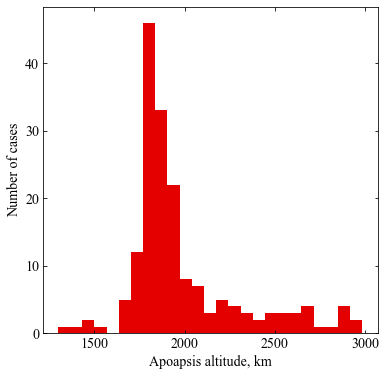

In [95]:
plt.figure(figsize=(6,6))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)
plt.hist(apoap_clean2, bins=25, color='xkcd:red')
plt.xlabel('Apoapsis altitude, km',fontsize=14)
plt.ylabel('Number of cases',fontsize=14)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)

plt.savefig('../plots/werner-smallsat-apoa-hist.png',bbox_inches='tight')
plt.savefig('../plots/werner-smallsat-apoa-hist.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../plots/werner-smallsat-apoa-hist.eps', dpi=300,bbox_inches='tight')
plt.show()

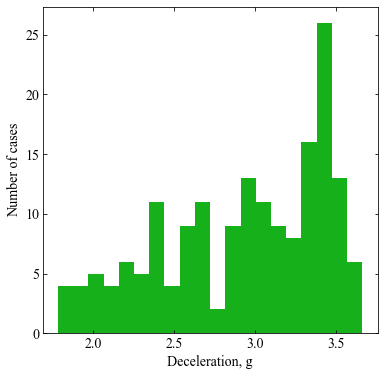

In [96]:
plt.figure(figsize=(6,6))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)
plt.hist(decel_clean2, bins=20, color='xkcd:green')
plt.xlabel('Deceleration, g',fontsize=14)
plt.ylabel('Number of cases',fontsize=14)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)

plt.savefig('../plots/werner-smallsat-decel-hist.png',bbox_inches='tight')
plt.savefig('../plots/werner-smallsat-decel-hist.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../plots/werner-smallsat-decel-hist.eps', dpi=300,bbox_inches='tight')
plt.show()

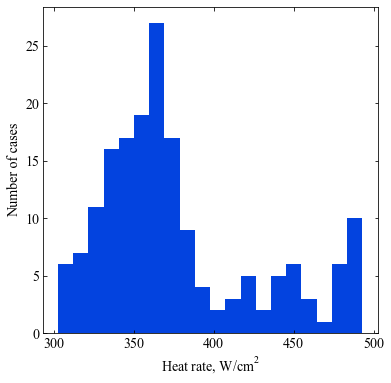

In [97]:
plt.figure(figsize=(6,6))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)
plt.hist(heatr_clean2, bins=20, color='xkcd:blue')
plt.xlabel('Heat rate, '+r'$W/cm^2$',fontsize=14)
plt.ylabel('Number of cases',fontsize=14)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)

plt.savefig('../plots/werner-smallsat-heat-hist.png',bbox_inches='tight')
plt.savefig('../plots/werner-smallsat-heat-hist.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../plots/werner-smallsat-heat-hist.eps', dpi=300,bbox_inches='tight')
plt.show()

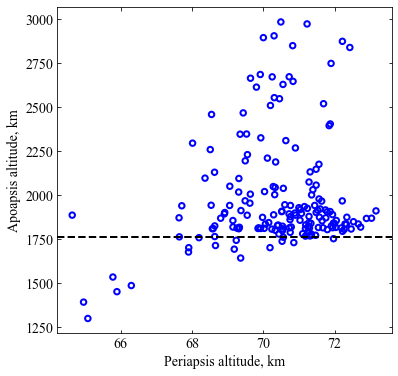

In [98]:
plt.figure(figsize=(6,6))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)
plt.scatter(peria_clean2, apoap_clean2, s=30, facecolors='none', edgecolors='b', lw=2)
plt.axhline(y=1760, lw=2.0, ls='dashed', color='k')
plt.xlabel('Periapsis altitude, km',fontsize=14)
plt.ylabel('Apoapsis altitude, km',fontsize=14)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)

plt.savefig('../plots/werner-smallsat-apoa-peri.png',bbox_inches='tight')
plt.savefig('../plots/werner-smallsat-apoa-peri.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../plots/werner-smallsat-apoa-peri.eps', dpi=300,bbox_inches='tight')
plt.show()

Find the percentage of cases which achieved apoapsis between 1000 and 3000 km.

In [94]:
(np.size(apoap) - np.size(del_index_low) - np.size(del_index_high))*100/np.size(apoap)

88.0

These results are different from those in the paper because of the different guidance schemes used here. This exercide did not attempt to optimize the guidance parameters. Further study can improve the apoapsis targeting.